In [27]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

In [3]:
pwd = os.getcwd()


In [5]:
dataset = pd.read_csv(pwd + "/Electric_Vehicle_Population_Size_History_By_County.csv")
dataset

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,December 31 2017,Ada,ID,Passenger,0,1,1,342,343,0.29
1,January 31 2018,Ada,ID,Passenger,0,1,1,340,341,0.29
2,February 28 2018,Ada,ID,Passenger,0,2,2,336,338,0.59
3,March 31 2018,Ada,ID,Passenger,0,2,2,328,330,0.61
4,April 30 2018,Ada,ID,Passenger,0,2,2,323,325,0.62
...,...,...,...,...,...,...,...,...,...,...
15812,September 30 2020,NaN,NaN,Passenger,2,0,2,185,187,1.07
15813,October 31 2020,NaN,NaN,Passenger,1,0,1,182,183,0.55
15814,November 30 2020,NaN,NaN,Passenger,1,0,1,180,181,0.55
15815,December 31 2020,NaN,NaN,Passenger,1,0,1,173,174,0.57


In [26]:
evPercent = dataset.copy()
columnsToDrop = ["Date","County","State","Vehicle Primary Use"	,"Battery Electric Vehicles (BEVs)"	,"Plug-In Hybrid Electric Vehicles (PHEVs)"	,"Total Vehicles",	"Percent Electric Vehicles"]
evPercent.drop(columns= columnsToDrop, inplace=True)
totalEV = sum(evPercent["Electric Vehicle (EV) Total"])
totalNonEV = sum(evPercent["Non-Electric Vehicle Total"])


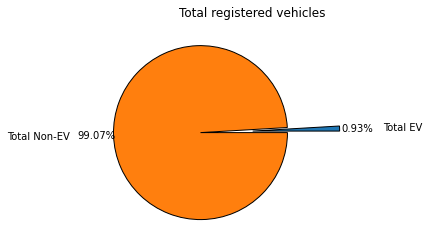

In [209]:

plt.pie([totalEV, totalNonEV], labels=["Total EV", "Total Non-EV"], explode= [0,0.6], wedgeprops ={'edgecolor':'black'}, autopct='%1.2f%%',pctdistance=1.2, labeldistance=1.5)
plt.title("Total registered vehicles")
plt.savefig("Image-RegisteredVehicles.pdf")

In [98]:
CountyDistribution = dataset.copy()
columnsToDrop = ["Date","Vehicle Primary Use","Battery Electric Vehicles (BEVs)","Plug-In Hybrid Electric Vehicles (PHEVs)"	,"Percent Electric Vehicles", "Total Vehicles","Non-Electric Vehicle Total"]
CountyDistribution.drop(columns= columnsToDrop, inplace= True)
CountyDistribution.dropna(inplace=True)
CountyDistribution =  CountyDistribution[CountyDistribution["State"] == 'WA']
CountyDistribution


,County,State,Electric Vehicle (EV) Total
37,Adams,WA,0
38,Adams,WA,2
39,Adams,WA,0
40,Adams,WA,4
41,Adams,WA,0
...,...,...,...
15750,Yakima,WA,9
15751,Yakima,WA,9
15752,Yakima,WA,586
15753,Yakima,WA,11


In [151]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5 else ''

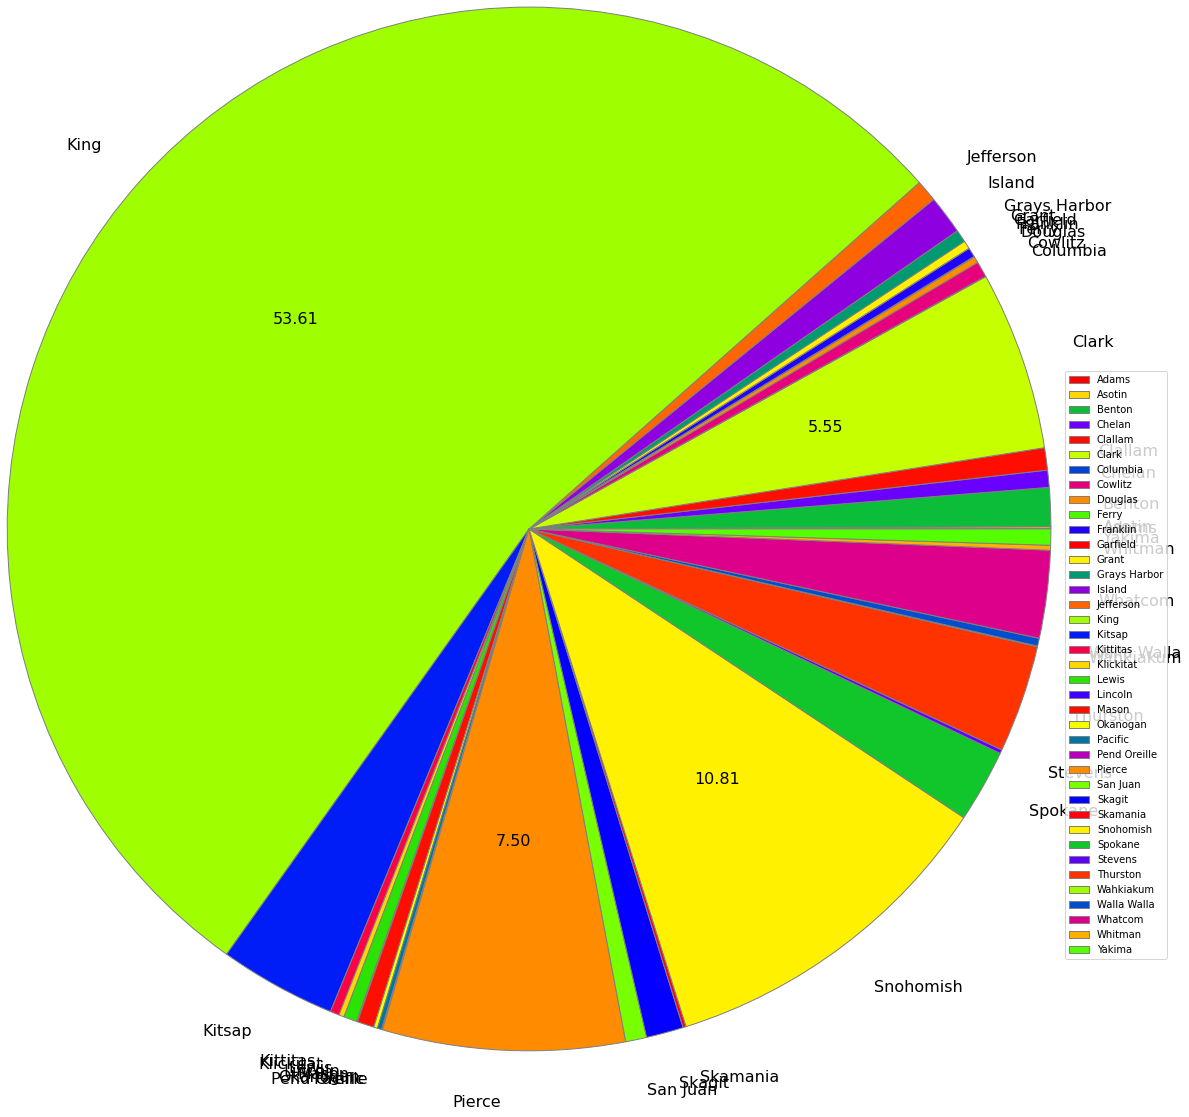

In [208]:
CountyDistribution.groupby(["County"]).sum().plot(kind="pie", y="Electric Vehicle (EV) Total", radius=6,autopct=my_autopct, ylabel="", fontsize=16,  wedgeprops={'linewidth': 1.0, 'edgecolor': 'gray'}, colormap="prism")
plt.legend(loc="lower center",bbox_to_anchor=(3.2, -1.5))
# plt.savefig("Image-CountyDistribution.pdf")

In [161]:
yearly = dataset.copy()
columnsToDrop = ["Vehicle Primary Use","Battery Electric Vehicles (BEVs)","Plug-In Hybrid Electric Vehicles (PHEVs)","Percent Electric Vehicles", "Total Vehicles","Non-Electric Vehicle Total","County", "State"]
yearly.drop(columns= columnsToDrop, inplace=True)
yearly

,Date,Electric Vehicle (EV) Total
0,December 31 2017,1
1,January 31 2018,1
2,February 28 2018,2
3,March 31 2018,2
4,April 30 2018,2
...,...,...
15812,September 30 2020,2
15813,October 31 2020,1
15814,November 30 2020,1
15815,December 31 2020,1


In [191]:
date = yearly["Date"]
for i in range(date.size):
    date.loc[i] = date[i][-4:]
yearly

d:\New folder (2)\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Electric Vehicle (EV) Total
0,2017,1
1,2018,1
2,2018,2
3,2018,2
4,2018,2
...,...,...
15812,2020,2
15813,2020,1
15814,2020,1
15815,2020,1


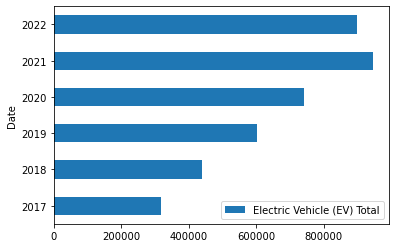

In [210]:
yearly.groupby("Date").sum().plot(kind="barh")
plt.savefig("Image-EVgrowth.pdf")